# Pandas

Тьюториалы:
- http://byumcl.bitbucket.org/bootcamp2013/labs/pandas.html
- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii

Примеры:
- http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook

Если нужно что-то более специальное -- смотрите в документации
- http://pandas.pydata.org/pandas-docs/stable/index.html

Рассмотрим сэмпл из данных по авиарейсам в США за январь-апрель 2008 года.


Полный датасет можно найти здесь: http://stat-computing.org/dataexpo/2009/2008.csv.bz2

Описание: http://stat-computing.org/dataexpo/2009/the-data.html

In [9]:
import pandas as pd

In [10]:
data = pd.read_csv('flights.csv')
data.head()

Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0     6987797  2008     12           9          2     1929        1852   
1     4060381  2008      7          24          4     1014        1006   
2     3336246  2008      6           3          2      915         915   
3      115014  2008      1          11          5     2016        1930   
4      398869  2008      1          11          5     1119        1120   

   ArrTime  CRSArrTime UniqueCarrier        ...          TaxiIn TaxiOut  \
0     2352        2329            CO        ...               5      23   
1     1249        1258            NW        ...               8      10   
2     1007        1017            EV        ...              11      10   
3     2140        2058            XE        ...               7      26   
4     1224        1240            MQ        ...               3       8   

   Cancelled  CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0          0               NaN         0            23             0        0   
1          0               NaN         0           NaN           NaN      NaN   
2          0               NaN         0           NaN           NaN      NaN   
3          0               NaN         0            42             0        0   
4          0               NaN         0           NaN           NaN      NaN   

  SecurityDelay  LateAircraftDelay  
0             0                  0  
1           NaN                NaN  
2           NaN                NaN  
3             0                  0  
4           NaN                NaN  

[5 rows x 30 columns]

In [3]:
data.columns

Index([u'Unnamed: 0', u'Year', u'Month', u'DayofMonth', u'DayOfWeek',
       u'DepTime', u'CRSDepTime', u'ArrTime', u'CRSArrTime', u'UniqueCarrier',
       u'FlightNum', u'TailNum', u'ActualElapsedTime', u'CRSElapsedTime',
       u'AirTime', u'ArrDelay', u'DepDelay', u'Origin', u'Dest', u'Distance',
       u'TaxiIn', u'TaxiOut', u'Cancelled', u'CancellationCode', u'Diverted',
       u'CarrierDelay', u'WeatherDelay', u'NASDelay', u'SecurityDelay',
       u'LateAircraftDelay'],
      dtype='object')

In [4]:
data.shape

(100000, 30)

In [14]:
data['Distance'].head()

0    1416
1     528
2     152
3     213
4     354
Name: Distance, dtype: int64

In [15]:
data['CancellationCode'].unique()

array([nan, 'A', 'B', 'C'], dtype=object)

In [19]:
data[['DepDelay', 'ArrDelay']][:10]

DepDelay  ArrDelay
0        37        23
1         8        -9
2         0       -10
3        46        42
4        -1       -16
5        -3        -2
6        -4       -12
7        44        39
8         0         6
9        12         9

Слайсы по столбцам и строкам:

In [26]:
data.iloc[:10, 1:4]

Year  Month  DayofMonth
0  2008     12           9
1  2008      7          24
2  2008      6           3
3  2008      1          11
4  2008      1          11
5  2008      9          13
6  2008      9          25
7  2008      4          26
8  2008      7           8
9  2008      6          20

#### Группировка данных

In [31]:
data.groupby('UniqueCarrier')

In [36]:
data.groupby('Cancelled')['Origin'].describe()

Cancelled        
0          count     98038
           unique      297
           top         ATL
           freq       5784
1          count      1962
           unique      204
           top         ORD
           freq        216
dtype: object

In [43]:
data.groupby('Cancelled')['CancellationCode'].value_counts()

Cancelled  CancellationCode
1          A                   793
           B                   787
           C                   382
dtype: int64

#### Объединение данных

In [45]:
carrier = data[data['CancellationCode'] == 'A']
weather = data[data['CancellationCode'] == 'B']

In [46]:
pd.concat([carrier, weather]).head()

Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
66       140022  2008      1          16          3      NaN        2000   
197      991373  2008      2          12          2      NaN         900   
287     1659482  2008      3           8          6      NaN        1940   
340     2379893  2008      4           9          3      NaN        1045   
402     2280003  2008      4          10          4      NaN         730   

     ArrTime  CRSArrTime UniqueCarrier        ...          TaxiIn TaxiOut  \
66       NaN        2216            YV        ...             NaN     NaN   
197      NaN        1045            MQ        ...             NaN     NaN   
287      NaN        2057            9E        ...             NaN     NaN   
340      NaN        1335            DL        ...             NaN     NaN   
402      NaN        1225            AA        ...             NaN     NaN   

     Cancelled  CancellationCode  Diverted  CarrierDelay  WeatherDelay  \
66           1                 A         0           NaN           NaN   
197          1                 A         0           NaN           NaN   
287          1                 A         0           NaN           NaN   
340          1                 A         0           NaN           NaN   
402          1                 A         0           NaN           NaN   

    NASDelay SecurityDelay  LateAircraftDelay  
66       NaN           NaN                NaN  
197      NaN           NaN                NaN  
287      NaN           NaN                NaN  
340      NaN           NaN                NaN  
402      NaN           NaN                NaN  

[5 rows x 30 columns]

In [47]:
pd.concat([carrier[:3], weather]).head()

Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
66       140022  2008      1          16          3      NaN        2000   
197      991373  2008      2          12          2      NaN         900   
287     1659482  2008      3           8          6      NaN        1940   
115      754677  2008      2          12          2      NaN        1710   
144     5346966  2008      9          14          7      NaN        1755   

     ArrTime  CRSArrTime UniqueCarrier        ...          TaxiIn TaxiOut  \
66       NaN        2216            YV        ...             NaN     NaN   
197      NaN        1045            MQ        ...             NaN     NaN   
287      NaN        2057            9E        ...             NaN     NaN   
115      NaN        1935            OH        ...             NaN     NaN   
144      NaN        2242            CO        ...             NaN     NaN   

     Cancelled  CancellationCode  Diverted  CarrierDelay  WeatherDelay  \
66           1                 A         0           NaN           NaN   
197          1                 A         0           NaN           NaN   
287          1                 A         0           NaN           NaN   
115          1                 B         0           NaN           NaN   
144          1                 B         0           NaN           NaN   

    NASDelay SecurityDelay  LateAircraftDelay  
66       NaN           NaN                NaN  
197      NaN           NaN                NaN  
287      NaN           NaN                NaN  
115      NaN           NaN                NaN  
144      NaN           NaN                NaN  

[5 rows x 30 columns]

#### Пропуски в данных

In [62]:
data['CarrierDelay'][:10]

0    23
1   NaN
2   NaN
3    42
4   NaN
5   NaN
6   NaN
7    39
8   NaN
9   NaN
Name: CarrierDelay, dtype: float64

In [53]:
data['CarrierDelay'].describe()

count    21545.000000
mean        15.759155
std         39.728067
min          0.000000
25%          0.000000
50%          0.000000
75%         16.000000
max       1092.000000
Name: CarrierDelay, dtype: float64

In [54]:
data['CarrierDelay'].isnull()[:10]

0    False
1     True
2     True
3    False
4     True
5     True
6     True
7    False
8     True
9     True
Name: CarrierDelay, dtype: bool

In [63]:
data[data['CarrierDelay'].isnull()][:10]

Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
1      4060381  2008      7          24          4     1014        1006   
2      3336246  2008      6           3          2      915         915   
4       398869  2008      1          11          5     1119        1120   
5      5140949  2008      9          13          6      948         951   
6      4917190  2008      9          25          4     1746        1750   
8      4192170  2008      7           8          2     1950        1950   
9      3054633  2008      6          20          5     2142        2130   
10     6797973  2008     12          14          7      554         600   
11     3080727  2008      6          28          6     1005        1000   
13     3858318  2008      7          22          2      817         806   

    ArrTime  CRSArrTime UniqueCarrier        ...          TaxiIn TaxiOut  \
1      1249        1258            NW        ...               8      10   
2      1007        1017            EV        ...              11      10   
4      1224        1240            MQ        ...               3       8   
5      1122        1124            EV        ...               4      28   
6      1953        2005            WN        ...               8       9   
8      2053        2047            CO        ...               5      25   
9      2254        2245            WN        ...               7      10   
10      741         755            FL        ...               5       8   
11     1048        1050            WN        ...               3       7   
13      936         929            UA        ...               5      32   

    Cancelled  CancellationCode  Diverted  CarrierDelay  WeatherDelay  \
1           0               NaN         0           NaN           NaN   
2           0               NaN         0           NaN           NaN   
4           0               NaN         0           NaN           NaN   
5           0               NaN         0           NaN           NaN   
6           0               NaN         0           NaN           NaN   
8           0               NaN         0           NaN           NaN   
9           0               NaN         0           NaN           NaN   
10          0               NaN         0           NaN           NaN   
11          0               NaN         0           NaN           NaN   
13          0               NaN         0           NaN           NaN   

   NASDelay SecurityDelay  LateAircraftDelay  
1       NaN           NaN                NaN  
2       NaN           NaN                NaN  
4       NaN           NaN                NaN  
5       NaN           NaN                NaN  
6       NaN           NaN                NaN  
8       NaN           NaN                NaN  
9       NaN           NaN                NaN  
10      NaN           NaN                NaN  
11      NaN           NaN                NaN  
13      NaN           NaN                NaN  

[10 rows x 30 columns]

Избавляемся от пропусков:

In [65]:
new_data = data.dropna(subset=['CarrierDelay'])
new_data.shape

(21545, 30)

In [66]:
new_data = data.dropna()
new_data.shape

(0, 30)

In [67]:
new_data.to_csv('has_carrier_delay.csv')

# Matplotlib

Тьюториалы:
- http://matplotlib.org/users/pyplot_tutorial.html
- http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb
- http://matplotlib.org/users/beginner.html

Примеры (просто делайте ctrl+f тип нужного графика):
- http://matplotlib.org/examples/pylab_examples/index.html

Документация:
- http://matplotlib.org/contents.html

Matplotlib + Pandas:
- http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [13]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [69]:
x = linspace(1, 10, 20)
y = np.log(x)

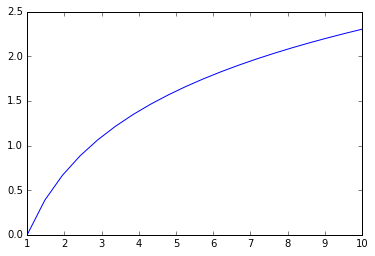

In [70]:
plot(x, y)

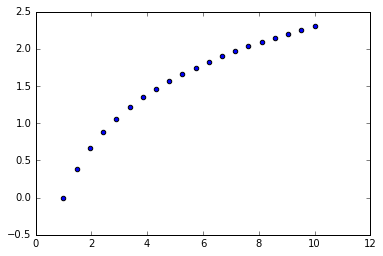

In [71]:
scatter(x, y)

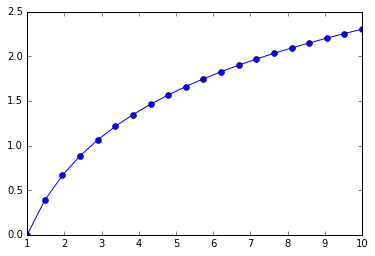

In [72]:
plot(x, y, 'bo-')

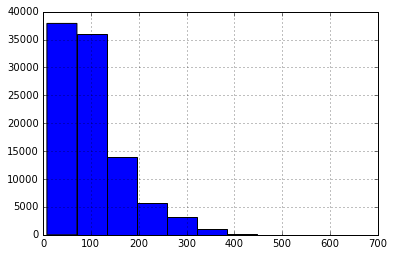

In [82]:
data['AirTime'].hist()

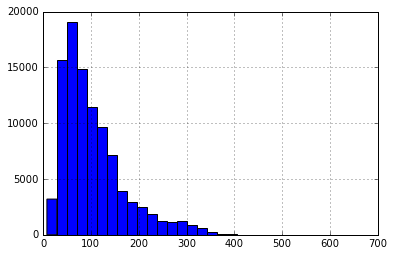

In [81]:
data['AirTime'].hist(bins=30)

С группировкой:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000104614E0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010021F98>], dtype=object)

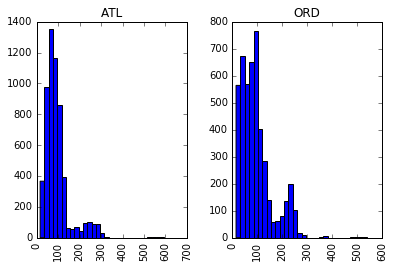

In [15]:
cmp_data = pd.concat([data[data['Origin'] == 'ATL'], 
                      data[data['Origin'] == 'ORD']])
cmp_data['AirTime'].hist(by=cmp_data['Origin'], bins=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000103E9FD0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000102080B8>], dtype=object)

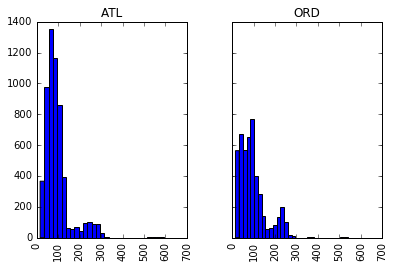

In [16]:
cmp_data['AirTime'].hist(by=cmp_data['Origin'], 
                         bins=30, sharey=True, sharex=True)

Как сделать то же самое в Matplotlib?

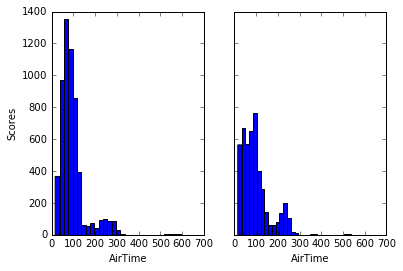

In [23]:
bins = 30
fig, axis = plt.subplots(1, 2, sharey=True, sharex=True)
axis[0].hist(cmp_data[cmp_data['Origin'] == 'ATL']['AirTime'].dropna(),
             bins=bins)
axis[0].set_xlabel('AirTime')
axis[0].set_ylabel('Scores')
axis[1].hist(cmp_data[cmp_data['Origin'] == 'ORD']['AirTime'].dropna(),
             bins=bins)
axis[1].set_xlabel('AirTime')

In [24]:
fig.clf()

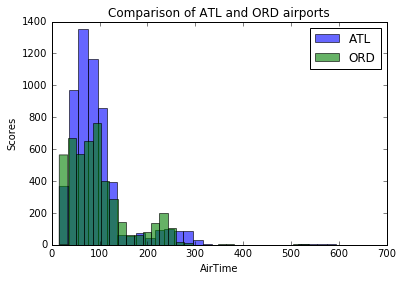

In [17]:
bins = 30
index = np.arange(bins)
plt.hist(cmp_data[cmp_data['Origin'] == 'ATL']['AirTime'].dropna(),
         bins=bins, alpha=0.6)
plt.hist(cmp_data[cmp_data['Origin'] == 'ORD']['AirTime'].dropna(),
         bins=bins, alpha=0.6)
plt.xlabel('AirTime')
plt.ylabel('Scores')
plt.title('Comparison of ATL and ORD airports')
plt.legend(['ATL', 'ORD'])
plt.show()

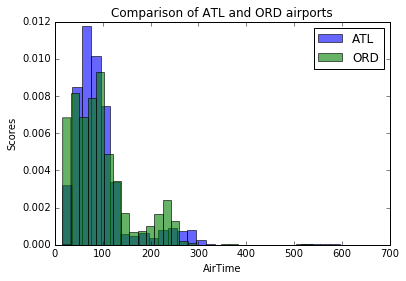

In [130]:
bins = 30
index = np.arange(bins)
plt.hist(cmp_data[cmp_data['Origin'] == 'ATL']['AirTime'].dropna(),
         bins=bins, alpha=0.6, normed=True)
plt.hist(cmp_data[cmp_data['Origin'] == 'ORD']['AirTime'].dropna(),
         bins=bins, alpha=0.6, normed=True)
plt.xlabel('AirTime')
plt.ylabel('Scores')
plt.title('Comparison of ATL and ORD airports')
plt.legend(['ATL', 'ORD'])
plt.show()

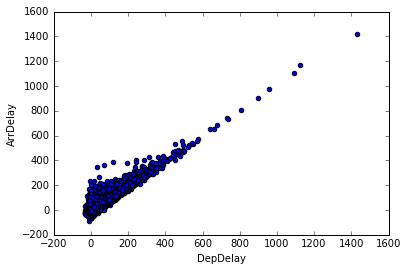

In [143]:
plt.scatter(data['DepDelay'], data['ArrDelay'])
plt.xlabel('DepDelay')
plt.ylabel('ArrDelay')

Component 1 explains 0.97 of total variance
Component 2 explains 0.03 of total variance


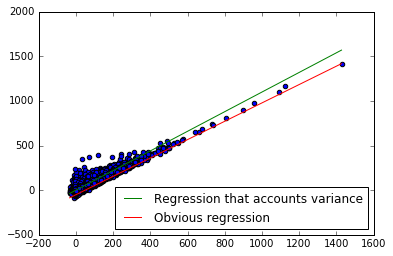

In [183]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
data_new = pca.fit_transform(data[['DepDelay', 'ArrDelay']].dropna())
print 'Component 1 explains %.2f of total variance'%pca.explained_variance_ratio_[0]
print 'Component 2 explains %.2f of total variance'%pca.explained_variance_ratio_[1]
plt.scatter(data['DepDelay'], data['ArrDelay'])
tg = pca.components_[0,1]/pca.components_[0,0]
plt.plot([data['DepDelay'].min(), data['DepDelay'].max()],
         [data['DepDelay'].min() * tg, data['DepDelay'].max() * tg], color='green')
plt.plot([data['DepDelay'].min(), data['DepDelay'].max()],
         [data['ArrDelay'].min(), data['ArrDelay'].max()], color = 'red')
plt.legend(['Regression that accounts variance', 'Obvious regression'], loc=4)

# Задания

По векторным операциям:
1. Найдите несколькими способами диагональ матричного произведения
2. Вставьте между каждым числом в заданном векторе четыре нуля
3. Найдите ближайшее значение в массиве к заданному
4. Найдите ближайшую строчку в массиве к заданной

По датасету flights:
1. Найдите рейс (FlightNum) с максимальной длиной перелетов. Уникален ли такой рейс?
2. Найдите для каждого аэропорта среднее время полета (AirTime) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?
3. Найдите аэропорт, у которого наибольшая доля задержанных (DepDelay > 0) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию filter после groupby).